In [1]:
import torch
import os
import toml
import matplotlib.pyplot as plt 
from torchvision import datasets, transforms
from torchinfo import summary

In [2]:
from utils import (
    device,
    train_transforms,test_transforms,
    train,test,
    train_losses,test_losses,train_acc,test_acc
    )
from model import Net

/home/muthu/miniconda3/envs/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
config = toml.load('config.toml')

In [4]:
DATAPATH:str = os.path.join(os.environ["HOME"],"Documents","Data")

# Dataset
train_data = datasets.MNIST(DATAPATH, train=True, download=False, transform=train_transforms)
test_data = datasets.MNIST(DATAPATH, train=False, download=False, transform=test_transforms)

In [5]:
kwargs = {
    'batch_size': config['batch_size'],
    'shuffle'   : config['shuffle'],
    'num_workers':config['num_workers'],
    'pin_memory': config['pin_memory']
}

test_loader = torch.utils.data.DataLoader(test_data,**kwargs)
train_loader = torch.utils.data.DataLoader(train_data,**kwargs)

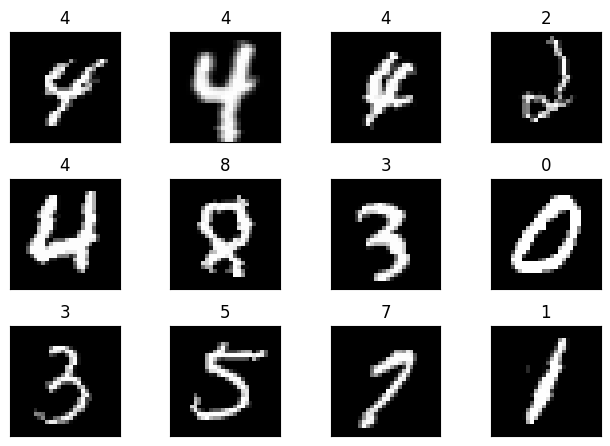

In [6]:
batch_data, batch_label = next(iter(train_loader)) 
fig = plt.figure()
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])
plt.show()

In [7]:
model = Net().to(device)

In [9]:
optimizer = torch.optim.SGD(
    model.parameters(), 
    lr=config['optimizer'].get('lr'), 
    momentum=config['optimizer'].get('momentum'),
)

scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer, 
    step_size=config['scheduler'].get('step_size') , 
    gamma=config['scheduler'].get('gamma'), 
)

criterion = torch.nn.functional.nll_loss

In [10]:
num_epochs = config['training'].get('num_epochs')

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Epoch 1


Train: Loss=0.2141 Batch_id=468 Accuracy=86.64: 100%|██████████| 469/469 [00:04<00:00, 108.32it/s]


Test set: Average loss: 0.0631, Accuracy: 9804/10000 (98.04%)

Epoch 2


Train: Loss=0.0997 Batch_id=468 Accuracy=97.51: 100%|██████████| 469/469 [00:04<00:00, 114.63it/s]


Test set: Average loss: 0.0408, Accuracy: 9864/10000 (98.64%)

Epoch 3


Train: Loss=0.0192 Batch_id=468 Accuracy=98.06: 100%|██████████| 469/469 [00:04<00:00, 114.27it/s]


Test set: Average loss: 0.0321, Accuracy: 9893/10000 (98.93%)

Epoch 4


Train: Loss=0.0221 Batch_id=468 Accuracy=98.45: 100%|██████████| 469/469 [00:04<00:00, 114.03it/s]


Test set: Average loss: 0.0269, Accuracy: 9905/10000 (99.05%)

Epoch 5


Train: Loss=0.0929 Batch_id=468 Accuracy=98.59: 100%|██████████| 469/469 [00:04<00:00, 113.54it/s]


Test set: Average loss: 0.0265, Accuracy: 9911/10000 (99.11%)

Epoch 6


Train: Loss=0.0440 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:04<00:00, 114.18it/s]


Test set: Average loss: 0.0248, Accuracy: 9924/10000 (99.24%)

Epoch 7


Train: Loss=0.0124 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:04<00:00, 114.78it/s]


Test set: Average loss: 0.0230, Accuracy: 9921/10000 (99.21%)

Epoch 8


Train: Loss=0.0648 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:03<00:00, 121.12it/s]


Test set: Average loss: 0.0208, Accuracy: 9923/10000 (99.23%)

Epoch 9


Train: Loss=0.0396 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:03<00:00, 120.71it/s]


Test set: Average loss: 0.0222, Accuracy: 9929/10000 (99.29%)

Epoch 10


Train: Loss=0.0630 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:03<00:00, 118.45it/s]


Test set: Average loss: 0.0194, Accuracy: 9932/10000 (99.32%)

Epoch 11


Train: Loss=0.0178 Batch_id=468 Accuracy=99.21: 100%|██████████| 469/469 [00:03<00:00, 120.21it/s]


Test set: Average loss: 0.0198, Accuracy: 9935/10000 (99.35%)

Epoch 12


Train: Loss=0.0618 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:04<00:00, 116.22it/s]


Test set: Average loss: 0.0194, Accuracy: 9939/10000 (99.39%)

Epoch 13


Train: Loss=0.0053 Batch_id=468 Accuracy=99.30: 100%|██████████| 469/469 [00:03<00:00, 118.45it/s]


Test set: Average loss: 0.0206, Accuracy: 9928/10000 (99.28%)

Epoch 14


Train: Loss=0.0414 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:03<00:00, 117.76it/s]


Test set: Average loss: 0.0192, Accuracy: 9940/10000 (99.40%)

Epoch 15


Train: Loss=0.0277 Batch_id=468 Accuracy=99.44: 100%|██████████| 469/469 [00:04<00:00, 114.93it/s]


Test set: Average loss: 0.0201, Accuracy: 9934/10000 (99.34%)

Epoch 16


Train: Loss=0.0003 Batch_id=468 Accuracy=99.62: 100%|██████████| 469/469 [00:04<00:00, 113.16it/s]


Test set: Average loss: 0.0161, Accuracy: 9940/10000 (99.40%)

Epoch 17


Train: Loss=0.0026 Batch_id=468 Accuracy=99.69: 100%|██████████| 469/469 [00:04<00:00, 112.73it/s]


Test set: Average loss: 0.0160, Accuracy: 9949/10000 (99.49%)

Epoch 18


Train: Loss=0.0137 Batch_id=468 Accuracy=99.66: 100%|██████████| 469/469 [00:04<00:00, 113.44it/s]


Test set: Average loss: 0.0158, Accuracy: 9945/10000 (99.45%)

Epoch 19


Train: Loss=0.0076 Batch_id=468 Accuracy=99.70: 100%|██████████| 469/469 [00:04<00:00, 113.17it/s]


Test set: Average loss: 0.0159, Accuracy: 9951/10000 (99.51%)

Epoch 20


Train: Loss=0.0070 Batch_id=468 Accuracy=99.69: 100%|██████████| 469/469 [00:04<00:00, 111.82it/s]


Test set: Average loss: 0.0159, Accuracy: 9942/10000 (99.42%)



Text(0.5, 1.0, 'Test Accuracy')

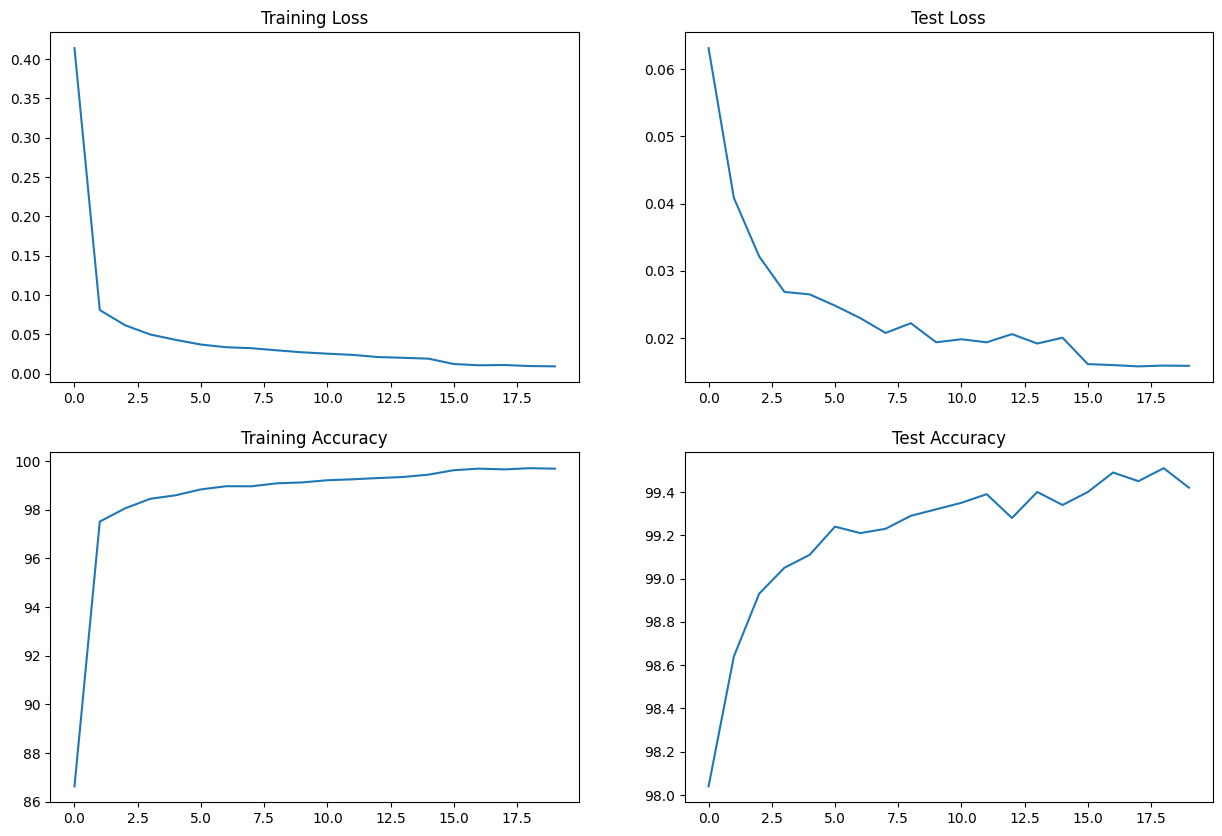

In [11]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [12]:
summary(model, input_size=(1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1, 10]                   --
├─Conv2d: 1-1                            [32, 26, 26]              320
├─Conv2d: 1-2                            [64, 24, 24]              18,496
├─Conv2d: 1-3                            [128, 10, 10]             73,856
├─Conv2d: 1-4                            [256, 8, 8]               295,168
├─Linear: 1-5                            [1, 50]                   204,850
├─Linear: 1-6                            [1, 10]                   510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 727.92
Input size (MB): 0.00
Forward/backward pass size (MB): 0.70
Params size (MB): 2.37
Estimated Total Size (MB): 3.08